<a href="https://colab.research.google.com/github/Farazmghm/Business-Machine-Learning-and-EDA/blob/main/weahter_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('/content/drive/MyDrive/weather.csv')

In [29]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32,55,3.5,26,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2,97,8.0,86,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3,85,6.0,96,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3,83,6.0,66,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28,74,8.5,107,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [30]:
df.shape

(13200, 11)

In [31]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  int64  
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  int64  
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [33]:
df.nunique()

,0
Temperature,126
Humidity,90
Wind Speed,97
Precipitation (%),110
Cloud Cover,4
Atmospheric Pressure,5456
UV Index,15
Season,4
Visibility (km),41
Location,3


In [34]:
df.describe(include='number')

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


.Temperature:The coldest temperature ever recorded on Earth is -89.2°C (-128.6°F) at Vostok Station in Antarctica on July 21, 1983. This record was set under extremely cold conditions in one of the coldest places on Earth on the other hand The highest temperature ever recorded on Earth is 56.7°C (134°F) at Furnace Creek Ranch in Death Valley, California, USA, on July 10, 1913. This temperature was recorded during an extreme heatwave in one of the hottest places on Earth.

.Humidity:In very dry environments, such as deserts, relative humidity can drop as low as 1-5%. These conditions are typically seen in arid regions like the Sahara Desert on the other hand  In highly humid environments, relative humidity can reach 100%, which occurs in tropical rainforests and during periods of heavy rainfall or fog.

. wind speed:wind speeds can be very low, nearly 0 km/h (0 mph). This often occurs in very calm weather or during periods of high pressureon the other hand wind speeds

.Precipitation:annual precipitation can be extremely low, sometimes as little as 2-10 mm (0.08-0.4 inches) per year. The Atacama Desert in Chile, for example, has some areas where annual rainfall is less than 1 mm (0.04 inches) on the other hand  The highest recorded annual precipitation is in Mawsynram, India, which receives approximately 467.4 inches (11,871 mm) of rain annually. This region is known for its intense monsoon rains.

.Atmospheric Pressure:These extremes are rare and typically associated with severe weather phenomena. In everyday conditions, atmospheric pressure usually ranges between 980 hPa and 1050 hPa
.UV Index: Low (0-2): Minimal risk of harm from unprotected sun exposure. You can safely be outside with minimal protection on the other hand  Extreme risk of harm. Avoid outdoor activities during peak sunlight hours and take all protective measures.
.Visibility:Visibility can drop to less than 1 km (0.6 miles) on the other hand Under optimal conditions, such as on a clear day with no obstructions, visibility can extend to over 100 km (62 miles)


In [35]:
def include_number(df):
  return df.select_dtypes(include='number')
numeric_df = include_number(df)
for column in numeric_df:
  mean= np.mean(numeric_df[column])
  std= np.std(numeric_df[column],ddof=1)
  lower=mean-std
  upper=mean+std
  print(f"Lower bound for {column}: {lower}")
  print(f"Upper bound for {column}: {upper}\n")




Lower bound for Temperature: 1.7412491752149712
Upper bound for Temperature: 36.51390233993655

Lower bound for Humidity: 48.51658524269728
Upper bound for Humidity: 88.90508142396936

Lower bound for Wind Speed: 2.9234928281656742
Upper bound for Wind Speed: 16.740901111228265

Lower bound for Precipitation (%): 21.69785316941256
Upper bound for Precipitation (%): 85.59093470937532

Lower bound for Atmospheric Pressure: 968.628307514618
Upper bound for Atmospheric Pressure: 1043.0274849096245

Lower bound for UV Index: 0.14915721432887485
Upper bound for UV Index: 7.862357937186276

Lower bound for Visibility (km): 2.0914177563127176
Upper bound for Visibility (km): 8.834415577020616



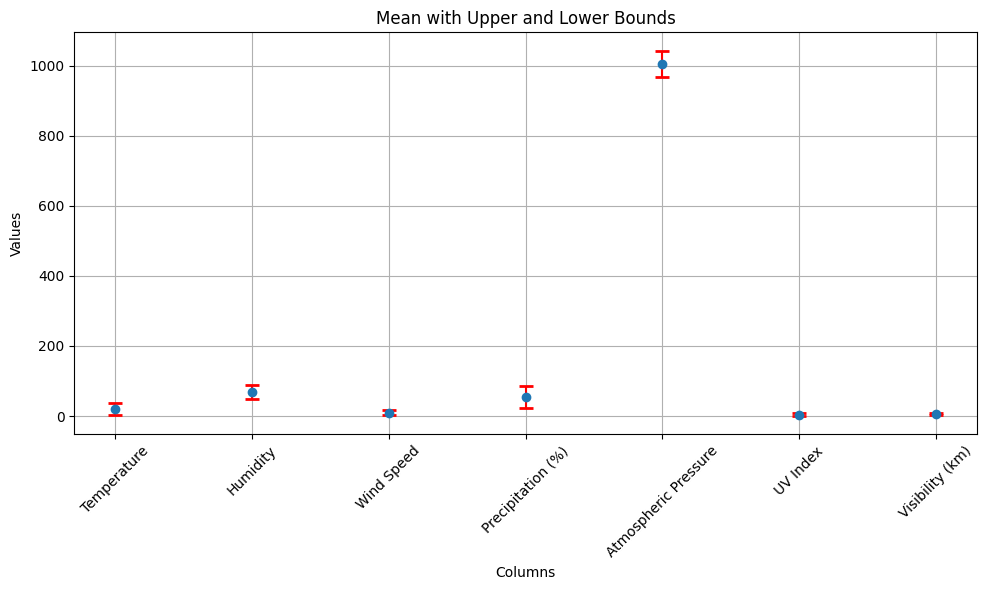

In [38]:
columns = []
means = []
lower_bounds = []
upper_bounds = []

# Calculate mean, lower, and upper bounds for each column
for column in numeric_df.columns:
    mean = np.mean(numeric_df[column])
    std = np.std(numeric_df[column], ddof=1)
    lower = mean - std
    upper = mean + std


    columns.append(column)
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)


means = np.array(means)
lower_bounds = np.array(lower_bounds)
upper_bounds = np.array(upper_bounds)


plt.figure(figsize=(10, 6))
plt.errorbar(columns, means, yerr=[means - lower_bounds, upper_bounds - means],
             fmt='o', ecolor='r', capsize=5, capthick=2)
plt.xticks(rotation=45)
plt.title('Mean with Upper and Lower Bounds')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()

plt.show()

.As can be seen from the plot, the reliable values for each numerical column are most likely to fall within the range indicated by the error bars (mean ± standard deviation). This range provides a useful estimate of where the majority of the data lies, allowing you to understand the variability and reliability of the data in each column.

By observing these ranges, you can make informed decisions or predictions based on the data, understanding that values outside these ranges are less common but still possible.